In [33]:
cpu_usage_file = 'memcached_logs.txt'

header = 'time_stamp,cpu_usage\n'

cpu_s = 1684927480 - 12
cpu_e = 1684927648 + 10

import pandas as pd
import numpy as np

sampling_interval_s = 5 # make sure its twice the sampling interval of the memcached logs

time_stamps = np.arange(cpu_s, cpu_e, sampling_interval_s)
cpu_usage = np.random.uniform(0, 100, len(time_stamps))


cpu_df = pd.DataFrame({'time_stamp': time_stamps, 'cpu_usage': cpu_usage})
cpu_df['time_stamp'] = cpu_df['time_stamp'].astype(int)
cpu_df['cpu_usage'] = cpu_df['cpu_usage'].round(1)
cpu_df.to_csv(cpu_usage_file, mode='w', header=True, index=False)
cpu_df

,time_stamp,cpu_usage
0,1684927468,88.4
1,1684927473,96.4
2,1684927478,32.2
3,1684927483,61.7
4,1684927488,26.1
5,1684927493,8.8
6,1684927498,52.1
7,1684927503,36.9
8,1684927508,24.7
9,1684927513,4.9


In [34]:
data_dir = '.'
filename = 'mcperf-output.txt'


import pandas as pd
from os.path import join
def sample_to_df(filename):
    df = pd.read_csv(join(data_dir, filename), sep='\s+', header=0, skipfooter=2, engine='python')
    df = df.drop(columns=['#type'])
    df = df.apply(lambda x: x/1e3)
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'sample_id'}, inplace=True)
    df['ts_start'] = df['ts_start'].astype(int)
    df['ts_end'] = df['ts_end'].astype(int)
    return df

mcperf_df = sample_to_df(filename)
mcperf_df

,sample_id,avg,std,min,p5,p10,p50,p67,p75,p80,p85,p90,p95,p99,p999,p9999,QPS,target,ts_start,ts_end
0,0,0.3679,0.3709,0.1735,0.2492,0.2706,0.3383,0.3654,0.3813,0.3943,0.4093,0.4326,0.4837,0.6420,7.0163,12.5636,4.9452,5.0,1684927480,1684927485
1,1,0.3844,0.4407,0.1607,0.2317,0.2544,0.3627,0.4008,0.4217,0.4353,0.4554,0.4799,0.5256,0.6642,5.8203,17.5336,10.0588,10.0,1684927486,1684927492
2,2,0.3776,0.3479,0.1607,0.2234,0.2420,0.3653,0.4129,0.4357,0.4530,0.4706,0.4975,0.5396,0.6630,2.6654,9.4344,14.8408,15.0,1684927493,1684927499
3,3,0.4000,0.2297,0.1607,0.2243,0.2433,0.3790,0.4514,0.4868,0.5093,0.5349,0.5652,0.6086,0.6997,1.8920,8.4231,19.8954,20.0,1684927500,1684927505
4,4,0.3993,0.2757,0.1607,0.2214,0.2382,0.3712,0.4436,0.4839,0.5102,0.5397,0.5747,0.6235,0.7290,2.8455,11.7422,24.9792,25.0,1684927507,1684927512
5,5,0.3823,0.2037,0.1607,0.2189,0.2344,0.3605,0.4229,0.4579,0.4817,0.5080,0.5429,0.5995,0.7296,1.5948,7.5352,30.0262,30.0,1684927514,1684927519
6,6,0.3909,0.2372,0.1607,0.2210,0.2373,0.3652,0.4303,0.4698,0.4983,0.5300,0.5682,0.6231,0.7417,1.7494,11.4639,35.1180,35.0,1684927520,1684927526
7,7,0.3930,0.2251,0.1607,0.2213,0.2373,0.3654,0.4341,0.4768,0.5078,0.5431,0.5831,0.6357,0.7409,1.1506,9.3041,40.1544,40.0,1684927527,1684927533
8,8,0.3817,0.1809,0.1607,0.2197,0.2347,0.3586,0.4213,0.4588,0.4865,0.5193,0.5597,0.6159,0.7243,1.0254,7.7256,44.9756,45.0,1684927534,1684927539
9,9,0.3771,0.2410,0.1607,0.2197,0.2348,0.3521,0.4113,0.4472,0.4726,0.5028,0.5401,0.5957,0.7328,1.5493,10.0903,49.8570,50.0,1684927541,1684927546


In [35]:
def get_cpu_usage(cpu_df, ts_start, ts_end):
    cpu_usage = cpu_df[(cpu_df['time_stamp'] >= ts_start) & (cpu_df['time_stamp'] <= ts_end)]['cpu_usage'].mean()
    return cpu_usage
mcperf_df['cpu_usage'] = mcperf_df.apply(lambda x: get_cpu_usage(cpu_df, x['ts_start'], x['ts_end']), axis=1)
mcperf_df


,sample_id,avg,std,min,p5,p10,p50,p67,p75,p80,...,p90,p95,p99,p999,p9999,QPS,target,ts_start,ts_end,cpu_usage
0,0,0.3679,0.3709,0.1735,0.2492,0.2706,0.3383,0.3654,0.3813,0.3943,...,0.4326,0.4837,0.6420,7.0163,12.5636,4.9452,5.0,1684927480,1684927485,61.70
1,1,0.3844,0.4407,0.1607,0.2317,0.2544,0.3627,0.4008,0.4217,0.4353,...,0.4799,0.5256,0.6642,5.8203,17.5336,10.0588,10.0,1684927486,1684927492,26.10
2,2,0.3776,0.3479,0.1607,0.2234,0.2420,0.3653,0.4129,0.4357,0.4530,...,0.4975,0.5396,0.6630,2.6654,9.4344,14.8408,15.0,1684927493,1684927499,30.45
3,3,0.4000,0.2297,0.1607,0.2243,0.2433,0.3790,0.4514,0.4868,0.5093,...,0.5652,0.6086,0.6997,1.8920,8.4231,19.8954,20.0,1684927500,1684927505,36.90
4,4,0.3993,0.2757,0.1607,0.2214,0.2382,0.3712,0.4436,0.4839,0.5102,...,0.5747,0.6235,0.7290,2.8455,11.7422,24.9792,25.0,1684927507,1684927512,24.70
5,5,0.3823,0.2037,0.1607,0.2189,0.2344,0.3605,0.4229,0.4579,0.4817,...,0.5429,0.5995,0.7296,1.5948,7.5352,30.0262,30.0,1684927514,1684927519,71.00
6,6,0.3909,0.2372,0.1607,0.2210,0.2373,0.3652,0.4303,0.4698,0.4983,...,0.5682,0.6231,0.7417,1.7494,11.4639,35.1180,35.0,1684927520,1684927526,10.50
7,7,0.3930,0.2251,0.1607,0.2213,0.2373,0.3654,0.4341,0.4768,0.5078,...,0.5831,0.6357,0.7409,1.1506,9.3041,40.1544,40.0,1684927527,1684927533,65.80
8,8,0.3817,0.1809,0.1607,0.2197,0.2347,0.3586,0.4213,0.4588,0.4865,...,0.5597,0.6159,0.7243,1.0254,7.7256,44.9756,45.0,1684927534,1684927539,51.90
9,9,0.3771,0.2410,0.1607,0.2197,0.2348,0.3521,0.4113,0.4472,0.4726,...,0.5401,0.5957,0.7328,1.5493,10.0903,49.8570,50.0,1684927541,1684927546,5.40


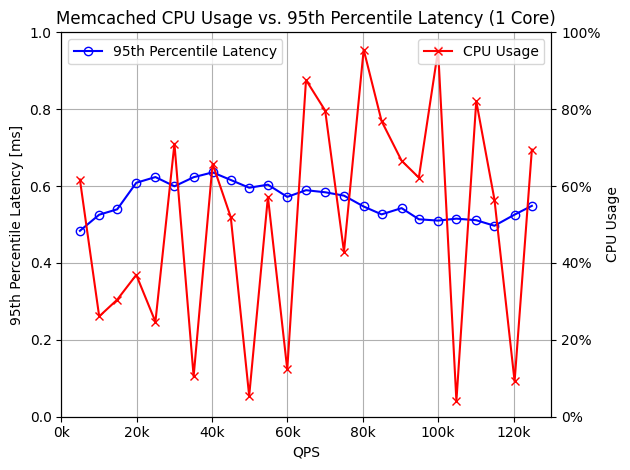

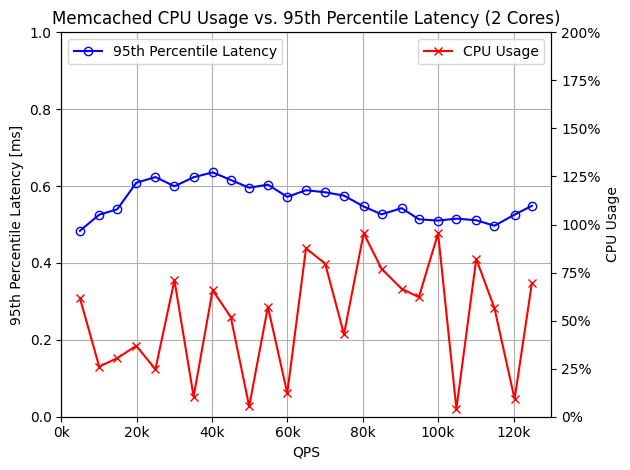

In [44]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

MCPERF_OUTPUT = 'mcperf-output.txt'
CPU_USAGE_OUTPUT = 'memcached_logs.txt'

for core in [1, 2]:
    # data_dir = f'cores-{core}'
    data_dir = 'dummy'
    mcperf_filepath = join(data_dir, MCPERF_OUTPUT)
    mcperf_df = sample_to_df(mcperf_filepath)

    cpu_usage_filepath = join(data_dir, CPU_USAGE_OUTPUT)
    cpu_df = pd.read_csv(cpu_usage_filepath, sep=',', header=0)

    def get_cpu_usage(cpu_df, ts_start, ts_end):
        cpu_usage = cpu_df[(cpu_df['time_stamp'] >= ts_start) & (cpu_df['time_stamp'] <= ts_end)]['cpu_usage'].mean()
        return cpu_usage
    mcperf_df['cpu_usage'] = mcperf_df.apply(lambda x: get_cpu_usage(cpu_df, x['ts_start'], x['ts_end']), axis=1)

    plot(mcperf_df, core)

def plot(df, n_cores):
    fig, ax1 = plt.subplots()
    ax1.plot(mcperf_df['QPS'], mcperf_df['p95'], 'bo-', fillstyle='none')
    ax1.set_xlabel('QPS')
    ax1.set_ylabel('95th Percentile Latency [ms]')

    ax2 = ax1.twinx()
    ax2.plot(mcperf_df['QPS'], mcperf_df['cpu_usage'], 'r-', marker='x')
    ax2.set_ylabel('CPU Usage')

    vals = ax2.get_yticks()

    def to_percent(y, position):
        return '{:,.0f}%'.format(y)

    ax2.yaxis.set_major_formatter(FuncFormatter(to_percent))
    ax1.set_xlim([0, 130])
    ax1.set_ylim([0, 1])
    ax2.set_ylim([0, n_cores * 100])

    ax1.grid(True)

    def qps_formatter(x, pos):
        return '{:.0f}k'.format(x)

    ax1.xaxis.set_major_formatter(FuncFormatter(qps_formatter))

    plt.title(f'Memcached CPU Usage vs. 95th Percentile Latency ({n_cores} Core{"" if n_cores == 1 else "s"})')

    # add legend
    ax1.legend(['95th Percentile Latency'], loc='upper left')
    ax2.legend(['CPU Usage'], loc='upper right')


    fig.tight_layout()
    plt.show()